# Phys 41 Final Project: Metropolis-Hastings Monte Carlo

This project implements the Metropolis-Hastings algorithm for Markov Chain Monte Carlo (MCMC), and uses this algorithm to solve multiple integrals.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Multiple integrals

A typical definite integral of a function $f(x)$ over domain $D$ can be written as $\int_{D}f(x)\;dx$, where $x\in\mathbb{R}^1$ and $D\in\mathbb{R}^1$. This can be extended to integrate functions of $n$ inputs, which are written as
$$\int_{D_n}\cdots\int_{D_1}f(x_1,\dots x_n)\;dx_1\cdots dx_n\;,$$
where $\left( x_1, \dots, x_n \right) \in \mathbb{R}^n$ and $\lbrace D_1,\dots,D_n \rbrace\subset\mathbb{R}^1$. In this project, visual examples will use functions of one variable, but integrals in higher dimensions will be evaluated using the same code. This is because it's simply too difficult to visualize data involving functions $f(x_1,\dots,x_n)$ where $n\gt2$.

## Example 1
Let's say one wants to evaluate the integral of $f(x)=\sqrt{x}$ on the domain $0\leq x\leq4$ and does so analytically. This integral can be written as
$$\int_{0}^{4}\sqrt{x}\;dx$$
As any single-variable calculus student could tell you, $\int\sqrt{x}\;dx=\frac{2}{3}x^{3/2}$, and our definite integral becomes
$$\frac{2}{3}x^{3/2}\,\Bigg\rvert_{0}^{4}=\frac{2}{3}\left[ 4^{3/2} - 0^{3/2} \right]=\frac{16}{3}=5.\bar{3}$$

Instead of calculating this definite integral analytically, it can be approximated numerically using simple Riemann summation:

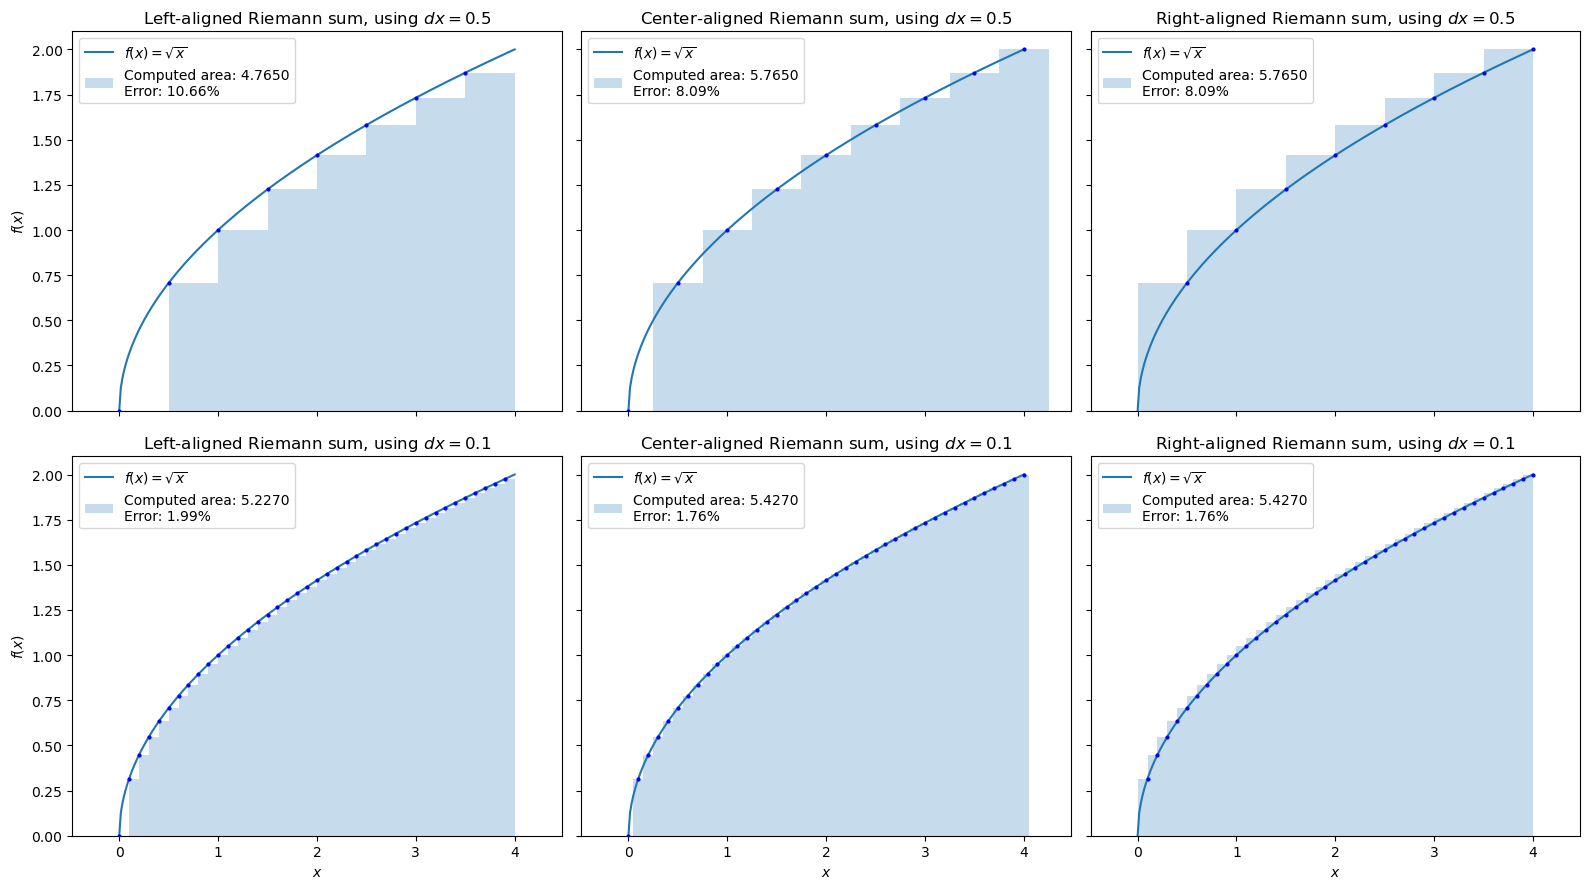

In [107]:
nrows, ncols = (2, 3)
fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(16, 9), sharex=True, sharey=True
)

j_indices, i_indices = np.meshgrid(np.arange(0, ncols), np.arange(0, nrows))
i_indices = i_indices.flatten()
j_indices = j_indices.flatten()

for i in range(0, len(i_indices)):
    ax = axes[i_indices[i]][j_indices[i]]
    domain = np.linspace(0, 4, 250)
    ax.plot(domain, np.sqrt(domain), label=r"$f(x)=\sqrt{x}$")

    if i in range(0, int(len(i_indices)/2)):
        dx = 0.5
    else:
        dx = 0.1
        
    if i % 3 == 0:
        alignment = "edge"
        domain = np.arange(0, 4, dx)
        width = dx
        ax.set_title(f"Left-aligned Riemann sum, using $dx={dx:0.1f}$")
    elif i % 3 == 1:
        alignment = "center"
        domain = np.arange(0, 4+dx, dx)
        width = dx
        ax.set_title(f"Center-aligned Riemann sum, using $dx={dx:0.1f}$")
    else:
        alignment = "edge"
        domain = np.arange(0+dx, 4+dx, dx)
        width = -1 * dx
        ax.set_title(f"Right-aligned Riemann sum, using $dx={dx:0.1f}$")

    heights = np.sqrt(domain)
    val = np.sum(heights*dx)
    label = f"Computed area: {val:0.4f}\nError: {100*abs(val-(16/3))/(16/3):0.2f}%"
    ax.bar(domain, heights, width=width, align=alignment, alpha=0.25, label=label)
    ax.scatter(domain, heights, color="blue", zorder=50, s=4)
    if i % 3 == 0:
        ax.set_ylabel("$f(x)$")
    if i >= 3:
        ax.set_xlabel("$x$")
    ax.legend()

plt.tight_layout()
fig.show()

Notice that as we decrease the width of each rectangle, the numerical approximation $S=\sum_{x\in\lbrace0,dx,2dx,\dots4/dx\rbrace} f(x)\;dx$ (assuming centered Riemann summation) approaches our analytical value of $\frac{16}{3}$ and has an increasingly small error. In fact, by the definition of the derivative, $\lim_{dx\rightarrow0}S\equiv\int_{0}^{4}\sqrt{x}\;dx=\frac{16}{3}$.

Althought numerical computation is quick an easy in this case, let's say one wants to evaluate another integral.

## Example 2